## Project 2
---------------------------------------------------
by Issam Chaaraddine


>This project involves an analysis of various datasets from 800.000 years to present, focusing on CO2, Temperature and CH4. We will validate the credibility of CO2 data by cross-referencing multiple data sources, notably from NOAA.  

>We will conduct a global analysis, followed by a specific investigation centered around Ireland where precipitations and temperatures will be compared. Additionally, we aim to make predictions based on the data.  

>Our primary objectives include the application of learned concepts from the course. We'll explore correlations, datetime functions, linear regression, and different data plotting techniques.

In [230]:
#first we will extract the extract the data temperature from Temperature Data from Jouzel - epicaDC.deuttemp.EDC3-AICC [1]Jouzel et al.,(2007)
#use index_col=0 to delete the automatic index from pandas  

import pandas as pd 
AICC =  pd.read_csv('files/Temperature Jouzel AICC.csv', index_col=0)
AICC

,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
bag,,,,,,
1,0,-50,-55,NaN,"218,3","3,105321"
2,"0,55","-43,55977","-50,51333333",NaN,"218,3","3,104805"
3,"1,1","-37,44019","-46,02666667",NaN,"218,3","3,104404"
4,"1,65","-31,64156","-41,54",NaN,"218,3","3,104025"
5,"2,2","-24,55278","-34,51666667",NaN,"218,3","3,103453"
...,...,...,...,...,...,...
5815,"3197,7","816871,6",817562,"-432,2",211,"1,529"
5816,"3198,25","817693,6",818631,"-431,4","211,2","1,548"
5817,"3198,8","818505,5",819700,"-430,3","211,3","1,576"


In [84]:
#extract 2 columns from dataset Temperature & AICC2012 which represents the years 
df = AICC[['temp', 'AICC2012']]
df

,temp,AICC2012
bag,,
1,"218,3",-55
2,"218,3","-50,51333333"
3,"218,3","-46,02666667"
4,"218,3","-41,54"
5,"218,3","-34,51666667"
...,...,...
5815,211,817562
5816,"211,2",818631
5817,"211,3",819700


In [62]:
#we will follow the same steps to extract the CO2 (ppmv) & Gasage (yr BP) [2]Luthi et al. (2008)
import pandas as pd

CO2 = pd.read_csv('files/CO2.csv')
dff = CO2[['Gasage (yr BP)','CO2 (ppmv)']]
dff


,Gasage (yr BP),CO2 (ppmv)
0,"-51,03","368,02"
1,"-48,00","361,78"
2,"-46,28","359,65"
3,"-44,41","357,11"
4,"-43,08","353,95"
...,...,...
1896,"803925,28","202,92"
1897,"804009,87","207,50"
1898,"804522,67","204,86"
1899,"805132,44","202,23"


>It's important to mention that exporting the data from xlsx to CSV was necessary in order to read tha data, once exported, the columns were easy to represent. However, once plotting the data it didn't show the results expected, after two days trying to undertsand the reason why the plots looked messy, we figured out that the numbers were exported as strings and not floats (due to quoation marks) to solve this issue we defined a delimiter and decimal: [3] Mark Tolonen, (2020). [4] Todd Iverson, (2017).
- delimiter=',', decimal=','


>We attempted to convert the years into a time series format. However, the range of convertible years begins at 400 years. The reaon why we chose to handle the years as integers. The reasults are similar as converting the years column into time series:

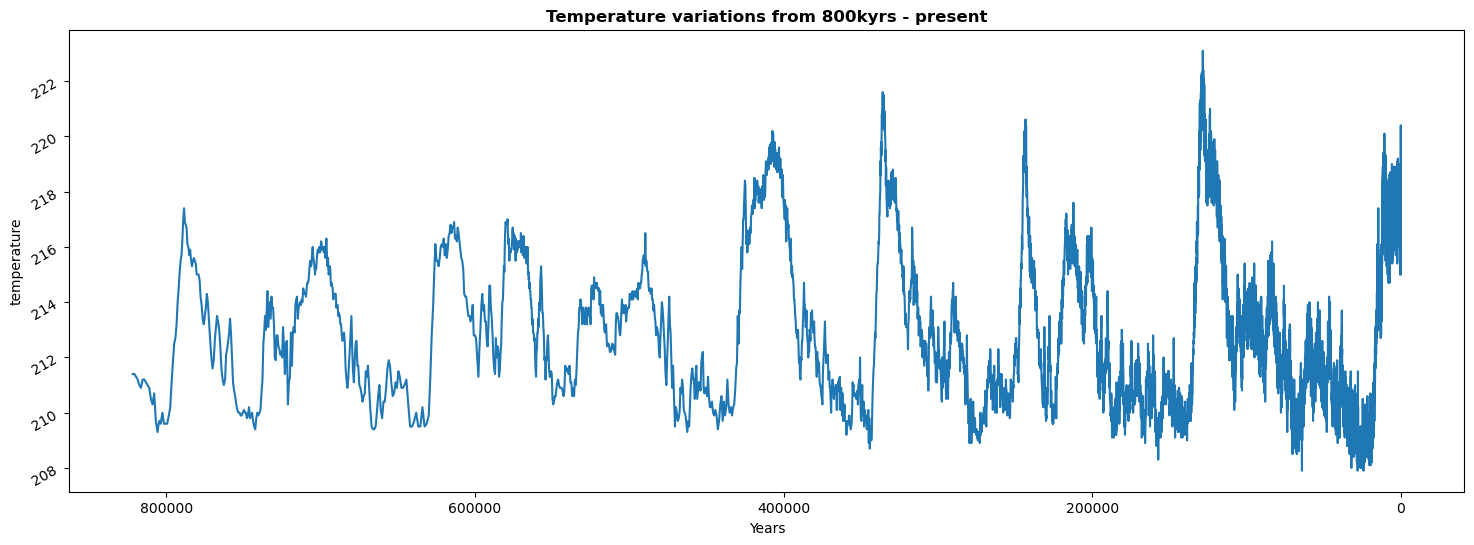

In [332]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Temperature Jouzel AICC.csv', delimiter=',', decimal=',')

plt.figure(figsize=(18, 6))

#define X and Y axis
x_axis = data['AICC2012']
y_axis = data['temp']
plt.plot(x_axis, y_axis)

# Rotate and align x-axis tick labels
plt.yticks(rotation=30, ha='right')

#invert xaxis [5]Trenton McKinney, (2023).

plt.gca().invert_xaxis()
plt.title("Temperature variations from 800kyrs - present",fontweight="bold")
plt.xlabel('Years')
plt.ylabel('temperature')

plt.show()



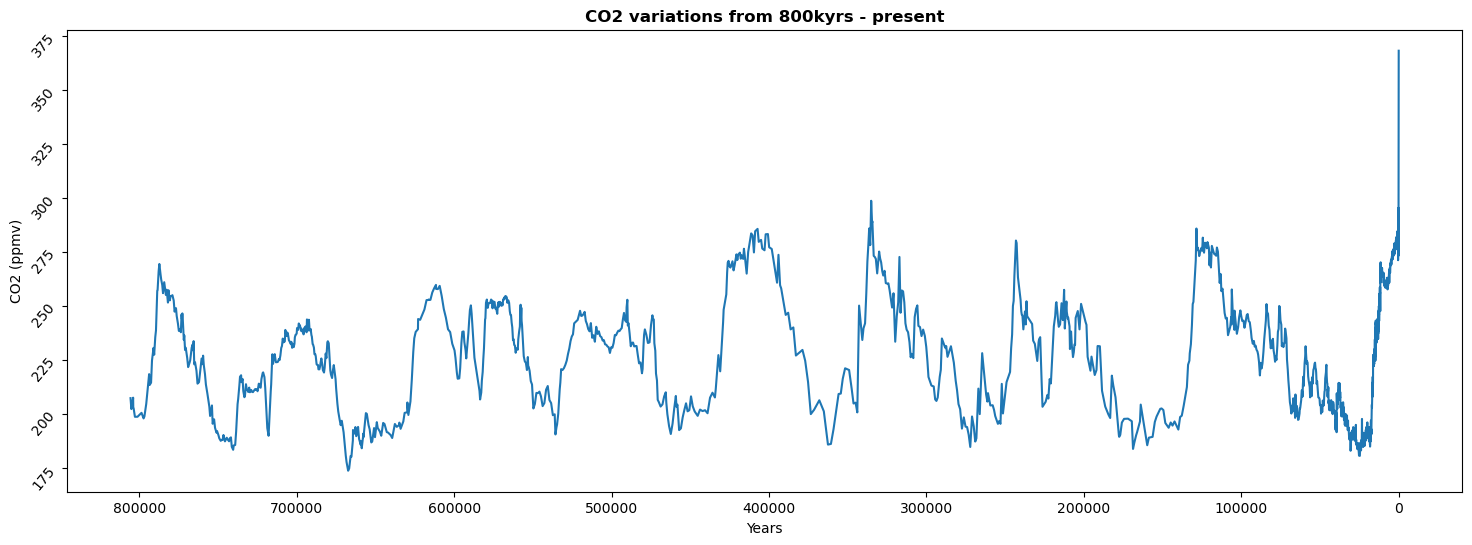

In [331]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the CSV file 
# [6] Bereiter et al. (2014).
CO2 = pd.read_csv('files/CO2.csv',delimiter=',', decimal=',')


# plotting Gasage (yr BP) vs CO2 (ppmv)
plt.figure(figsize=(18, 6))
x_axis = CO2['Gasage (yr BP)']
y_axis = CO2['CO2 (ppmv)']
plt.plot(x_axis, y_axis)


# Set y-axis ticks [7] 8one6, (2014).

plt.yticks(rotation=50, ha='right')
plt.gca().invert_xaxis()
plt.title("CO2 variations from 800kyrs - present",fontweight="bold")
plt.xlabel('Years')
plt.ylabel('CO2 (ppmv)')
plt.show()


We will visualize these two plots next to each other for a better view for comparison: [8]Rishikesh Kumar Rishi, (2023).

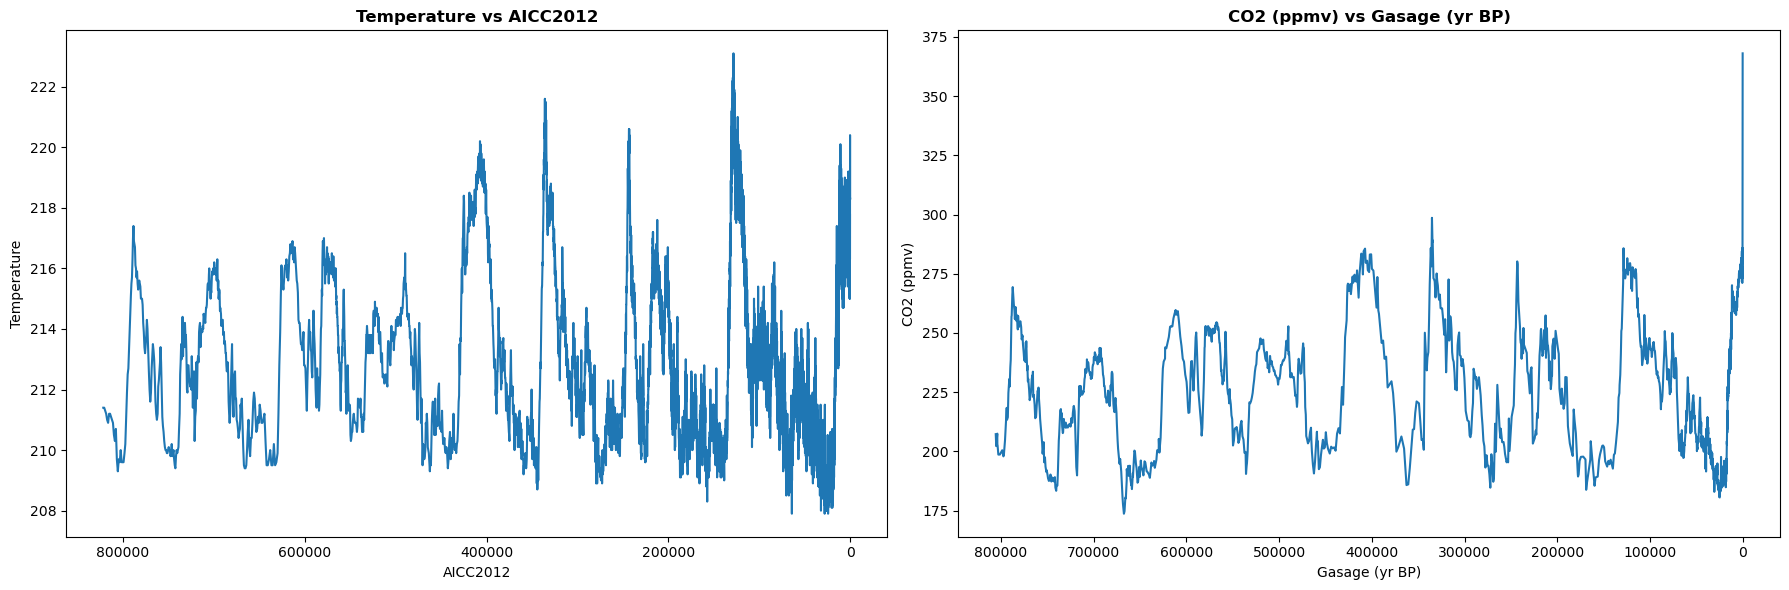

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('files/Temperature Jouzel AICC.csv', delimiter=',', decimal=',')
CO2 = pd.read_csv('files/CO2.csv',delimiter=',', decimal=',')


x1Points = data['AICC2012']
x2Points = CO2['Gasage (yr BP)']

y1Points = data['temp']
y2Points = CO2['CO2 (ppmv)']

plt.figure(figsize=(18, 6))

# For Plot 1: 
#1 represents the number of rows, 2 the number of columns & index the position of the subplot, in this case 1. [9]Only god knows, (2023).
 
plt.subplot(1, 2, 1)
plt.plot(x1Points, y1Points)
plt.title("Temperature vs AICC2012",fontweight="bold")
plt.xlabel('AICC2012')
plt.ylabel('Temperature')
plt.gca().invert_xaxis()

# For Plot 2: 
plt.subplot(1, 2, 2)
plt.plot(x2Points, y2Points)
plt.title("CO2 (ppmv) vs Gasage (yr BP)",fontweight="bold")
plt.xlabel('Gasage (yr BP)')
plt.ylabel('CO2 (ppmv)')
plt.gca().invert_xaxis()


plt.tight_layout()

plt.show()

>Upon observing both plots, it's apparent that the variables 'Temperature' and 'CO2' are directly correlated. The rise in temperature could be attributed to the elevated levels of CO2 in the atmosphere, which contribute to the greenhouse effect. However, recent studies also claim that CO2 and Temperature can affect each other, that is, not only the increase of CO2 can provoque an increase of temperature, but also the increase of temperatures can increase the levels of CO2. [10] (Joe Barton, US House of Representatives (Texas) 1985-2019).

It's also interesting the notable increase of CO2 in the most recent years reported which probably will be reflected in the temperature scores in the future.

## Examine accuracy of CO2 datasets
----------------------------------------

As part of the project, it's important to conduct a comparative analysis of the CO2 datasets. This comparison aims to validate the reliability and consistency of the different CO2 data sets provided:

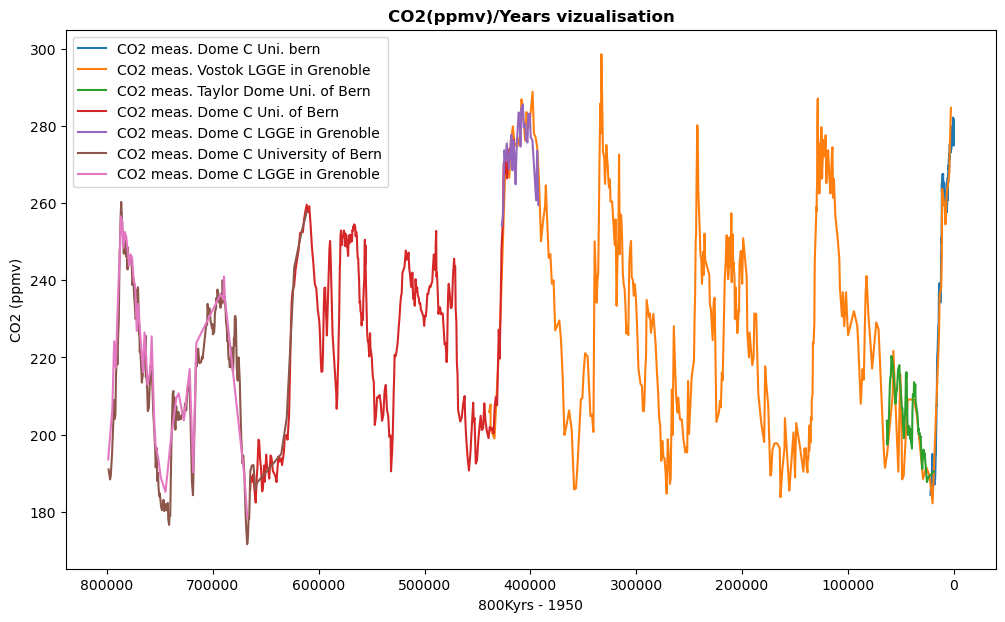

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the data and 
# add skiprows parameter to start data reading where numeric values begin
data = pd.read_csv('files/CO2_all.csv', delimiter=',', decimal=',',skiprows=5)

#use iloc[:] to select columns to plot [11]Naveen.
data['ds1'] = data.iloc[:, [1]]
data['co1'] = data.iloc[:, [2]]

data['ds2'] = data.iloc[:, [5]]
data['co2'] = data.iloc[:, [6]]

data['ds3'] = data.iloc[:, [8]]
data['co3'] = data.iloc[:, [9]]

data['ds4'] = data.iloc[:, [12]]
data['co4'] = data.iloc[:, [13]]

data['ds5'] = data.iloc[:, [16]]
data['co5'] = data.iloc[:, [17]]

data['ds6'] = data.iloc[:, [19]]
data['co6'] = data.iloc[:, [20]]

data['ds7'] = data.iloc[:, [23]]
data['co7'] = data.iloc[:, [24]]

# plot all CO2 using lineplot() [12]Michael Waskom, (2023).
plt.figure(figsize=(12, 7))
sns.lineplot(data=data, x='ds1', y='co1', label='CO2 meas. Dome C Uni. bern')
sns.lineplot(data=data, x='ds2', y='co2', label='CO2 meas. Vostok LGGE in Grenoble')
sns.lineplot(data=data, x='ds3', y='co3', label='CO2 meas. Taylor Dome Uni. of Bern')
sns.lineplot(data=data, x='ds4', y='co4', label='CO2 meas. Dome C Uni. of Bern')
sns.lineplot(data=data, x='ds5', y='co5', label='CO2 meas. Dome C LGGE in Grenoble')
sns.lineplot(data=data, x='ds6', y='co6', label='CO2 meas. Dome C University of Bern')
sns.lineplot(data=data, x='ds7', y='co7', label='CO2 meas. Dome C LGGE in Grenoble')

plt.title('CO2(ppmv)/Years vizualisation',fontweight="bold")
plt.xlabel('800Kyrs - 1950')
plt.ylabel('CO2 (ppmv)')

#invert axis 
plt.gca().invert_xaxis()


>When we represent the combined dataset on a dashboard, there is an overall accuracy. However, a slight deviation of approximately 15 CO2 (ppmv) is noticeable between the Vostok (LGGE Grenoble) and Taylor Dome (University of Bern) datasets, occurring around the 50K-year mark.

>Now we will compare the temperature variables from the datasets 'Temperature Data from Jouzel' which corresponds to temperature scored in the Antartica from 800kyrs until 1950 vs the 'Temperature data from NOAA'. First we would need to create a xlsx file and clean the data, then convert the dataset into csv. Because the data is provided in Kelvin, we need to change the temperature provided on the first dataset into Celsius, that is, we need need to deduct 273.15 from each value, then we will convert the values from the NOAA dataset from Fahrenheit into Celsius and then we will plot both datasets:

In [431]:
#converting 'Temp data from Jouzel' from Kelvin into Celsius
import pandas as pd 

data = pd.read_csv('files/Temperature Jouzel AICC.csv', delimiter=',', decimal=',')

#https://stackoverflow.com/questions/30794525/adding-one-to-all-the-values-in-a-dataframe#:~:text=df%5B%22Gene1%22%5D%20%3D%20df%5B%22Gene1%22%5D%20%2B%201 

data["temp_celsius"] = data["temp"] -273.15

#save into new csv file
#data.to_csv('files/Temperature Jouzel to celsius.csv', index=False)



In [5]:
#converting 'Temperature data from NOAA' Fahrenheit into Celsius
import pandas as pd 

data = pd.read_csv('files/Temperature_NOAA.csv')

#https://stackoverflow.com/questions/30794525/adding-one-to-all-the-values-in-a-dataframe#:~:text=df%5B%22Gene1%22%5D%20%3D%20df%5B%22Gene1%22%5D%20%2B%201 

data["temp_celsius"] = (data["Temperature"] - 32) * 5/9

#save into new csv file
#data.to_csv('files/Temperature NOAA to celsius.csv', index=False)


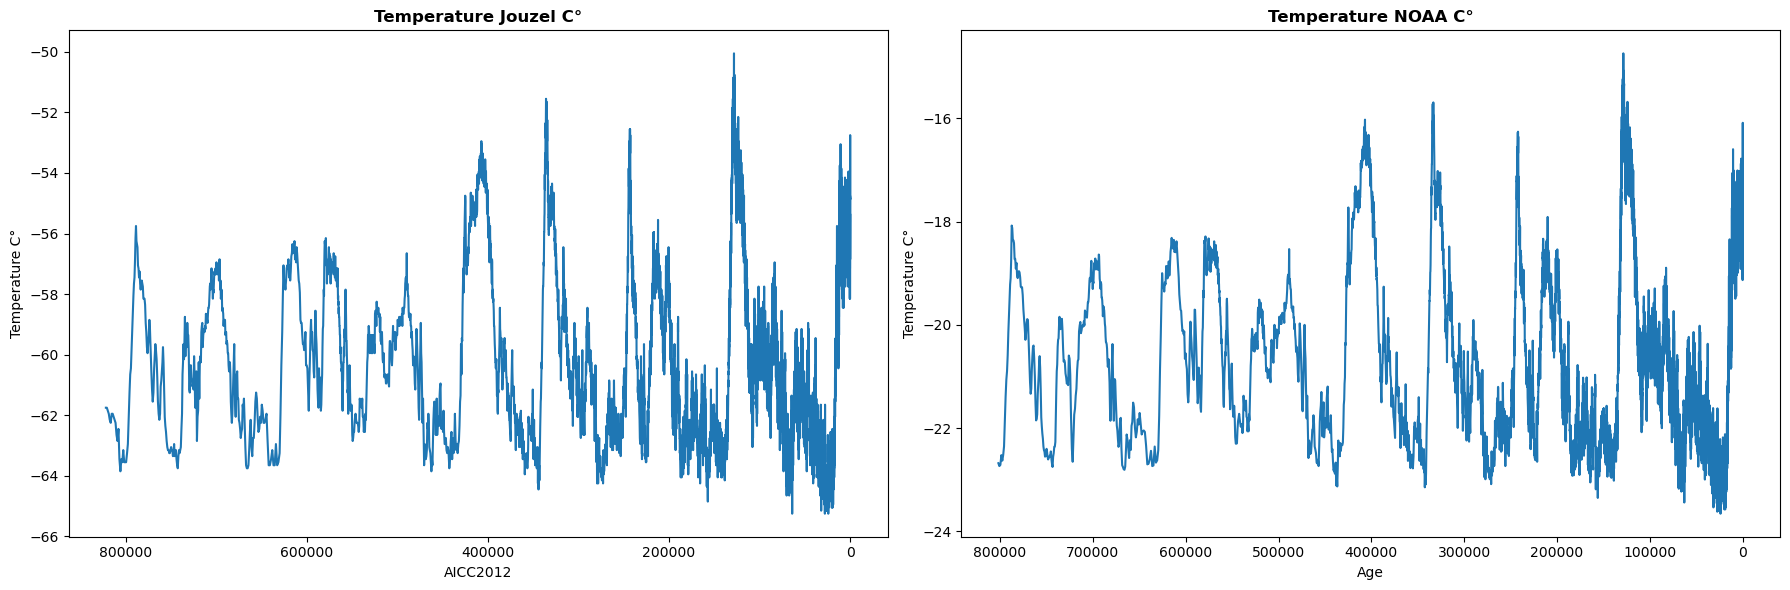

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


temp_noaa = pd.read_csv('files/Temperature NOAA to celsius.csv')
temp_jouzel = pd.read_csv('files/Temperature Jouzel to celsius.csv')

temp_jouzel['AICC2012'] = temp_jouzel['AICC2012']

x1Points = temp_jouzel['AICC2012']
x2Points = temp_noaa['Age']

y1Points = temp_jouzel['temp_celsius']
y2Points = temp_noaa['temp_celsius']

plt.figure(figsize=(18, 6))

#plot Jouzel: 
#1 represents the number of rows, 2 the number of columns & index the position of the subplot
 
plt.subplot(1, 2, 1)
plt.plot(x1Points, y1Points)
plt.title("Temperature Jouzel C°",fontweight="bold")
plt.xlabel('AICC2012')
plt.ylabel('Temperature C°')
plt.gca().invert_xaxis()

#plot NOAA: 
plt.subplot(1, 2, 2)
plt.plot(x2Points, y2Points)
plt.title("Temperature NOAA C°",fontweight="bold")
plt.xlabel('Age')
plt.ylabel('Temperature C°')
plt.gca().invert_xaxis()


plt.tight_layout()


## Examine CH4 features:
----------------------------------------------------------

CH4 dataset: PERIOD OF RECORD 800 KYrBP to 1950 [13] ELaetitia Loulergue, et al. 2008.

CH4 datasedt PERIOD OF RECORD 1983 - 2023: [14] USE OF NOAA GML DATA Xin Lan, (2024).

Text(0, 0.5, 'CH4 mean')

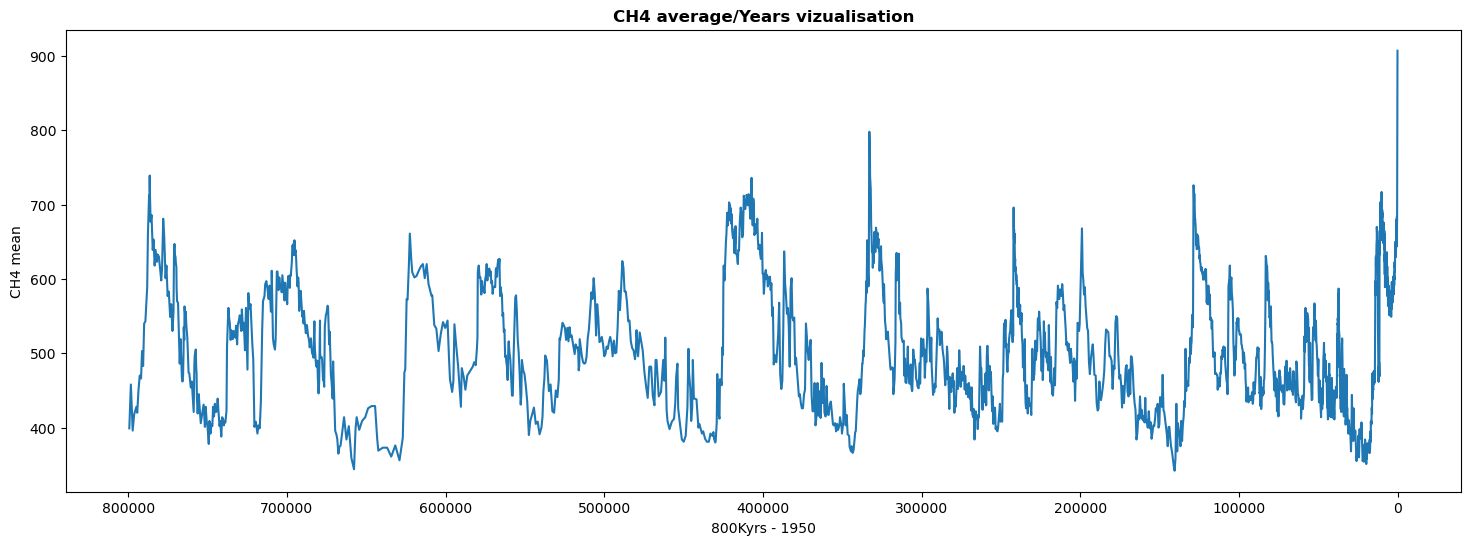

In [429]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#first merge all data into a csv file

data = pd.read_csv('files/ATMOSPHERIC METHANE- Tabellenblatt2.csv', delimiter=',', decimal=',')

plt.figure(figsize=(18, 6))
x_axis = data['Gas Age']
y_axis = data['CH4 mean']
plt.plot(x_axis, y_axis)
plt.gca().invert_xaxis()

plt.title('CH4 average/Years vizualisation',fontweight="bold")
plt.xlabel('800Kyrs - 1950')
plt.ylabel('CH4 mean')




>The result of plotting the CH4 average from 800Kyrs to 1950 show a similar results as when plotting CO2 levels for the same period of time which could indicate a correlation between these two factors. In order to understand the scale of correlation between the Temperature - CH4 and CO2 from 800Kyrs - present (1950), we will check the correlations. 

In [366]:
import pandas as pd

# Read the data
temp_data = pd.read_csv('files/Temperature Jouzel AICC.csv', delimiter=',', decimal=',')
CO2 = pd.read_csv('files/CO2.csv', delimiter=',', decimal=',')
ch4_data = pd.read_csv('files/ATMOSPHERIC METHANE- Tabellenblatt2.csv', delimiter=',', decimal=',')


#calculate correlations
#reference: [15] Rishikesh Kumar Rishi, (2023).
correlation_CH4_CO2 = ch4_data['CH4 mean'].corr(CO2['CO2 (ppmv)'])
correlation_CH4_temp = ch4_data['CH4 mean'].corr(temp_data['temp'])
correlation_CO2_temp = CO2['CO2 (ppmv)'].corr(temp_data['temp'])

#print results
print(f"Correlation between CH4 mean and CO2: {correlation_CH4_CO2}")
print(f"Correlation between CH4 mean and Temperature: {correlation_CH4_temp}")
print(f"Correlation between CO2 and Temperature: {correlation_CO2_temp}")

Correlation between CH4 mean and CO2: 0.31044398977279747
Correlation between CH4 mean and Temperature: 0.09553730561919603
Correlation between CO2 and Temperature: 0.3357106189235533


>Surprisingly, our findings reveal a very weak correlation between CH4 and Temperature (corr = 0.095). Similarly, the correlations between CH4 vs. CO2 and CO2 vs. Temperature stand at 0.31 and 0.33 respectively, indicating weak associations.  

>However, despite these correlation values, visual comparisons of the graphs suggest a higher correlation, given their similar patterns.  
[16] BMJ Publishing Group Ltd., 2024.

## CO2 and Temperature from 800Kyrs - Lag variables:
-----------------------------------------------

> According to this study "in Science magazine illustrated that a rise in carbon dioxide did not precede a rise in temperatures, but actually lagged behind temperature rises by 200 to 1000 years.  A rise in carbon dioxide levels could not have caused a rise in temperature if it followed the temperature." [10] Joe Barton, (US House of Representatives (Texas) 1985-2019)  

>In order to demonstarte this phenomenon we will move the the 'temp' data results which were assigned to 1950 to 1350, that is, 600 years back, the purpose is to align the temp data with the CO2 data from 1950. For that we will create lag variables in pandas:  
[17] RASGO Intelligence, 2024.


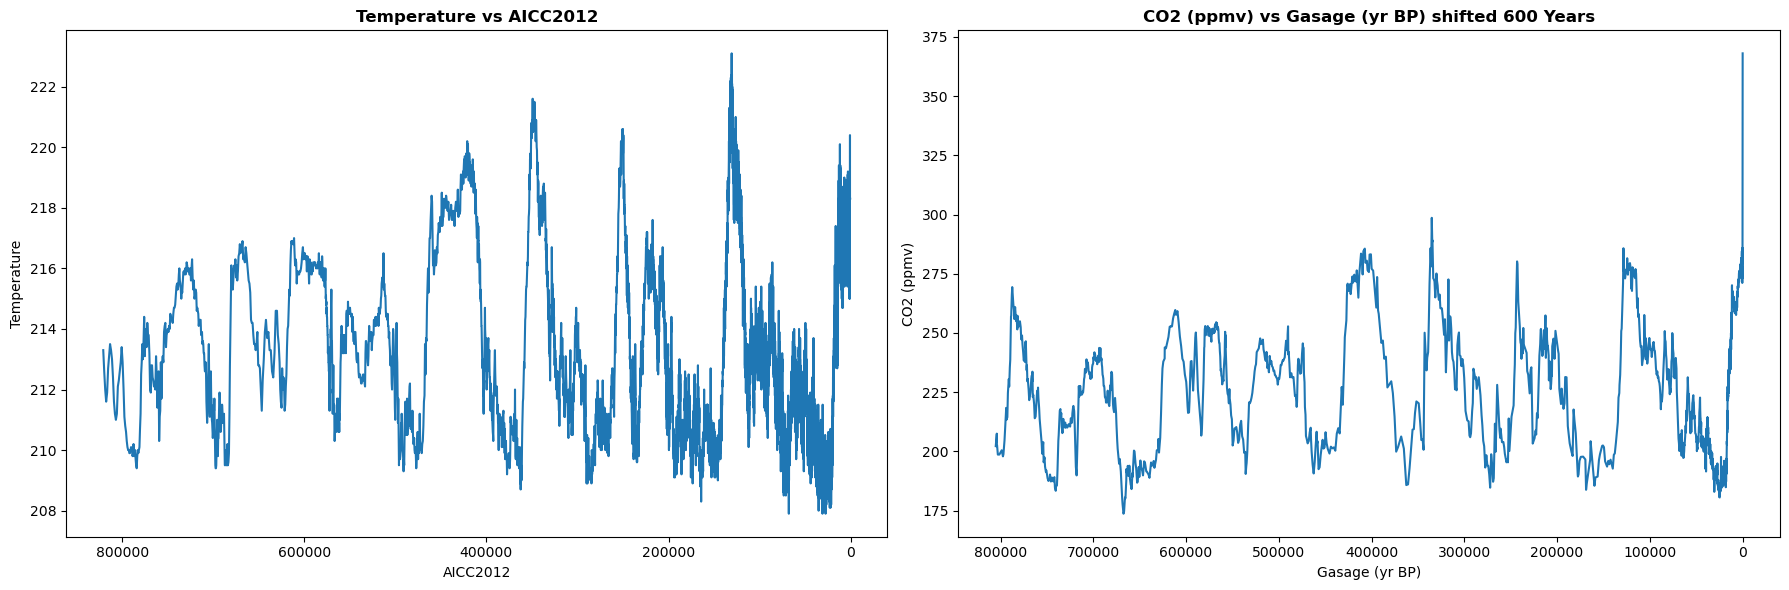

In [424]:
import matplotlib.pyplot as plt
import pandas as pd

# Read data
data = pd.read_csv('files/Temperature Jouzel AICC.csv', delimiter=',', decimal=',')
CO2 = pd.read_csv('files/CO2.csv', delimiter=',', decimal=',')

#changes in CO2 appear to follow changes in temperatures by about 200 to 1000 years, we will shift the Temperature values assigned to 1950 to the year 1300 and plot data again together with the CO2 (ppmv) of 1950.

df = pd.DataFrame()
df['temperature'] = data['temp'].shift(62)
df['years_temp'] = data['AICC2012'].shift(1)

df['co2_levels'] = CO2['CO2 (ppmv)'].shift(1)
df['years_co2'] = CO2['Gasage (yr BP)'].shift(1)

#save new lag dataframe into csv file 
#df.to_csv('files/lag_df.csv', index=False)

#plot the data
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(df['years_temp'],df['temperature'])
plt.title("Temperature vs AICC2012",fontweight="bold")
plt.xlabel('AICC2012')
plt.ylabel('Temperature')
plt.gca().invert_xaxis()

#plot 2: 
plt.subplot(1, 2, 2)
plt.plot(df['years_co2'],df['co2_levels'])
plt.title("CO2 (ppmv) vs Gasage (yr BP) shifted 600 Years",fontweight="bold")
plt.xlabel('Gasage (yr BP)')
plt.ylabel('CO2 (ppmv)')
plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()




## Examine the Irish context:
--------------------------------------

>Precipitations Ireland from 1711 to 2016, [18] UK Meteorological Office Note, (2018).

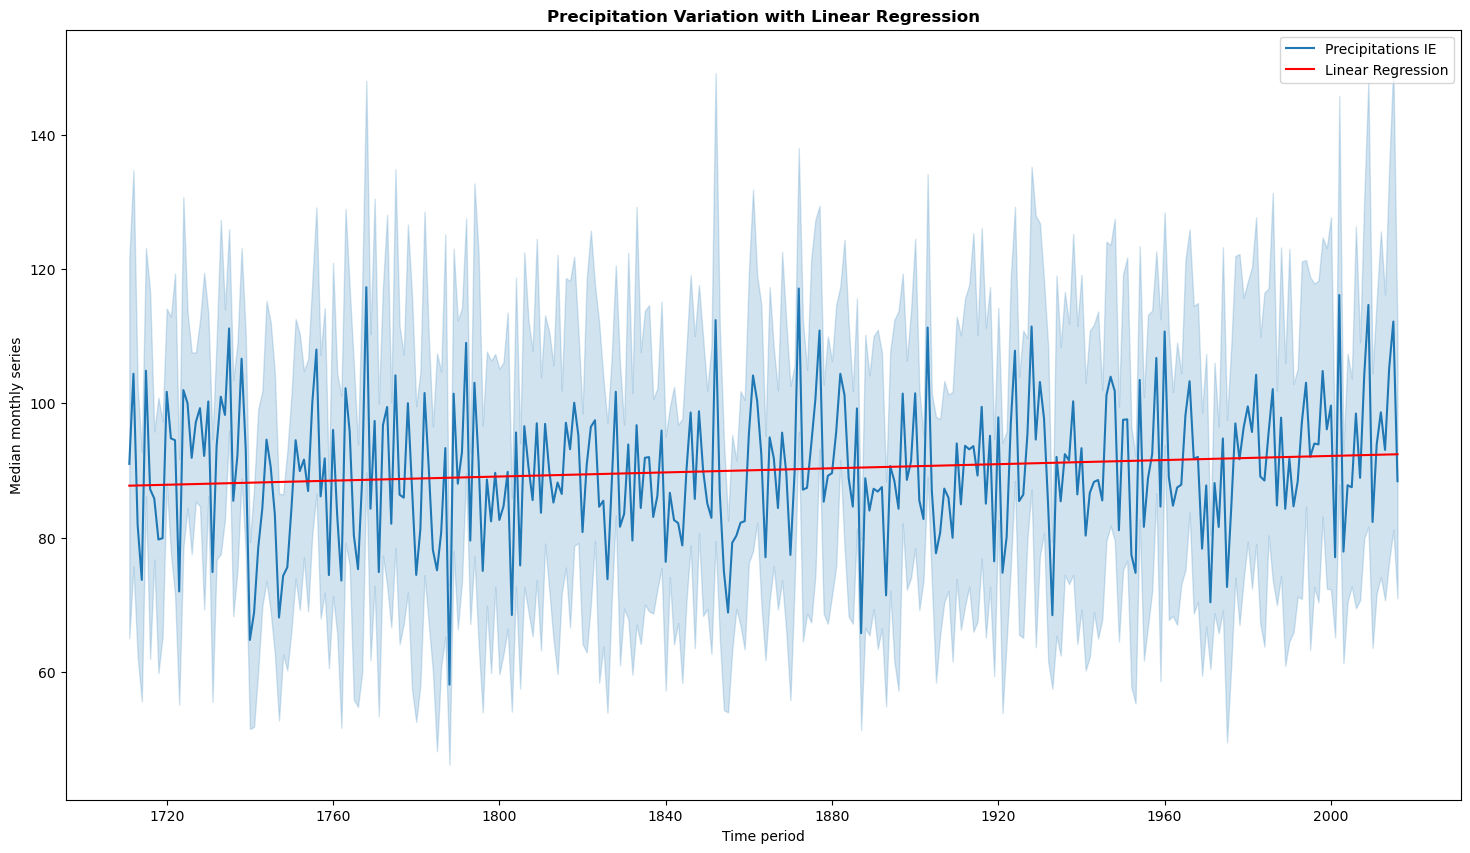

In [85]:
# precipitations Ireland from 1711 to 2016

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('files/Precipitations_ireland.csv')

# extract date by datetime [19]Vijetha, (2023).
pd.to_datetime(data['Year']).dt.year

# create new column for 'Year' to be displayed in datetime format [20]Mcginley, B. (2023).

# add .astype(str) to convert column values in string, important step if we want to use datetime()! [21]Naveen, (2024).

data['Time period'] = pd.to_datetime(data['Year'].astype(str))

plt.figure(figsize=(18, 10))
sns.lineplot(data=data,x='Time period', y='Median monthly series',label='Precipitations IE')  # Scatter plot with relplot

#for the linear regression, the variable 'Time Period' must be converted to integer because it's saved in datetime format [22]tdy, 2022.

m, intercept = np.polyfit(data['Time period'].astype(int), data['Median monthly series'], 1)
regression_line = m * data['Time period'].astype(int) + intercept

plt.plot(data['Time period'], regression_line, color='red', label='Linear Regression')


plt.title('Precipitation Variation with Linear Regression',fontweight="bold")
plt.xlabel('Time period')
plt.ylabel('Median monthly series')
plt.legend()

plt.show()




>The plotted data reveals a consistent upward trend in temperature over the past 300 years in Ireland. Notably, recent years show exceptionally higher precipitations levels which may potentially be linked to increasing temperatures as we can see in the temperature plot below, which gathers registerered temperature data in Ireland from 1958 to 2022: [23] MTM02, 2023.

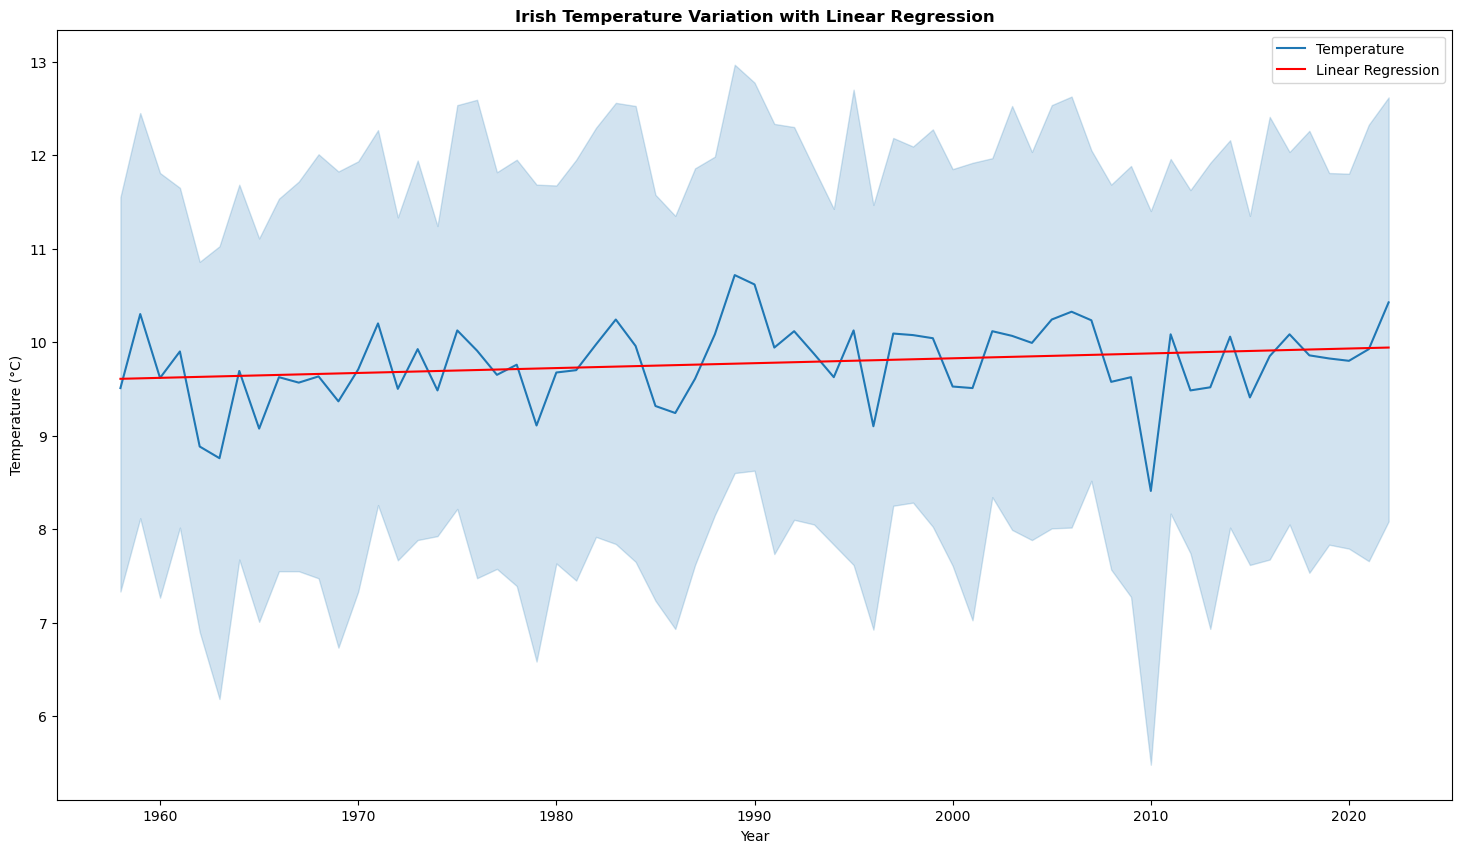

In [291]:
# Temperature Ireland from 1958 to 2022

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the data
data = pd.read_csv('files/Temp_ireland.csv', delimiter=',', decimal=',')

# Convert 'Year' column to datetime
data['Period'] = pd.to_datetime(data['Year'].astype(str))

# Plot the temperature data
plt.figure(figsize=(18, 10))
sns.lineplot(data=data, x='Period', y='VALUE', label='Temperature')

# for the linear regression, the variable 'Period' must be converted to integer
m, intercept = np.polyfit(data['Period'].astype(int), data['VALUE'], 1)
regression_line = m * data['Period'].astype(int) + intercept

# Plot the regression line
plt.plot(data['Period'], regression_line, color='red', label='Linear Regression')

# Set plot title and labels
plt.title('Irish Temperature Variation with Linear Regression',fontweight="bold")
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.show()


>The linear regression trend indicates a gradual increase in temperatures over the last 60 years in Ireland. However, we can also identify peak temperatures in 1989 and maximum temperature levels in 2010 which indicates some anomalies or extreme climatic conditions in the last two decades.

In [7]:
#convert file into json file. [30] Python examples, 2023.
import csv
import json

def csv_to_json(csvFilePath, jsonFilePath):
    jsonArray = []

    #read csv file
    with open(csvFilePath, encoding='utf-8') as csvf:
        # load csv file data using csv library's dictionary reader
        csvReader = csv.DictReader(csvf)

        # convert each csv row into a python dict
        for row in csvReader:
            # add this python dict to the json array
            jsonArray.append(row)

    #convert python jsonArray to JSON String and write to file
    with open(jsonFilePath, 'w', encoding='utf-8') as jsonf:
        jsonString = json.dumps(jsonArray, indent=4)
        jsonf.write(jsonString)

# File paths
csvFilePath = 'files/Temp_ireland.csv'
jsonFilePath = 'files/Temp_ireland.json'

# Convert CSV to JSON
csv_to_json(csvFilePath, jsonFilePath)



## Temperature prediction for the next 20 years
--------------------------------------------------

>According to studies shared from the NOAA, for the last 50 years, temperatures have increased about 0.13 and the global temperature is expected to increase by 0.2°C per decade. [24] CLIMATE.GOV STAFF, (2015).

>To synthetize the data we will create a random distribution based on the data of Global Temperature for the last 50 years: [25]Data Society, (2016).

[]

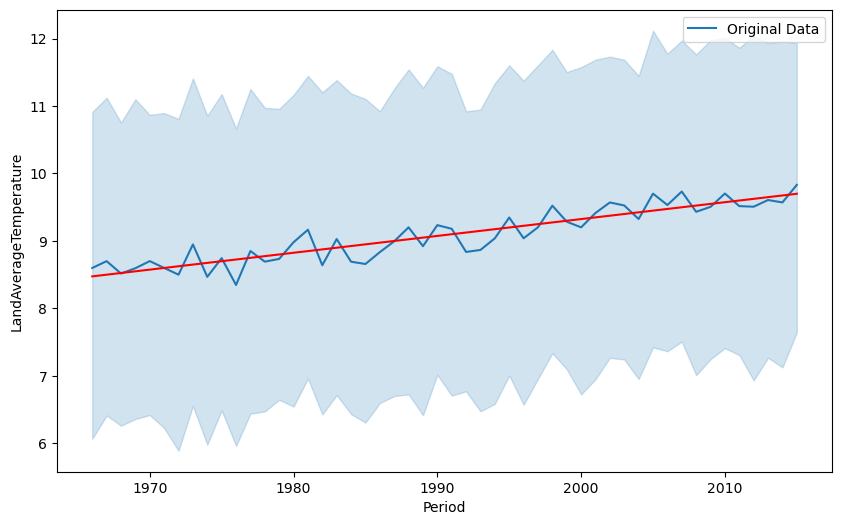

In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data
data = pd.read_csv('files/GlobalTemperatures.csv')

# Converting 'dt' column to datetime and extracting the year
data['Period'] = pd.to_datetime(data['dt']).dt.year

# Splitting the data into features (X) and target variable (y)

plt.figure(figsize=(10, 6))

# Plotting the original data
sns.lineplot(data=data, x='Period', y='LandAverageTemperature', label='Original Data')

m, intercept = np.polyfit(data['Period'].astype(int), data['LandAverageTemperature'], 1)
regression_line = m * data['Period'].astype(int) + intercept

# Plotting the predicted temperatures
plt.plot(data['Period'], regression_line, color='red', label='Linear Regression')
plt.plot()

> Then we will calculate the average temperature from 1966 to 2016:

In [208]:
import pandas as pd

data = pd.read_csv('files/GlobalTemperatures.csv')

# [26] Malli, 2023.
average_temp = data['LandAverageTemperature'].mean()
print(average_temp)

9.086701666666666


>finally we will create a random distribution for the future decades by adding 0.4°C to the average temperature and creating 20 values (one per year) and sort them from min to max temperature. 

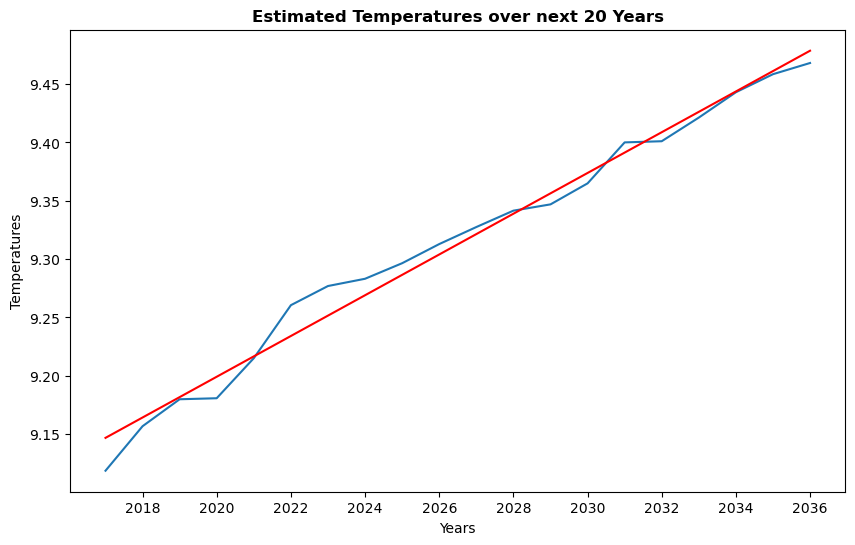

In [425]:
import numpy as np
import pandas as pd

#create a random distribution for temperatures

num = 20  # 20 random values which correspond to each year 
start = 9.087 #average temperature of the last 50 years 
end = 9.487  # we have added 0.4°C, because according to the study above, temperatures are expected to increase 0.2°C per decade  

# random uniform [27]NumPy Developers, (2022).
result_1 = np.random.uniform(start, end, num)

# sort data [28]NumPy Developers, (2022)
temperatures = np.sort(result_1)

# create an random distribution from 2016 to 2036 
years = pd.date_range(start='2016', end='2036', freq='Y')

#create dataframe for variables
data = pd.DataFrame({'Years': years, 'Temperatures': temperatures})

#define linear regression
m, intercept = np.polyfit(data['Years'].astype(int), data['Temperatures'], 1)
regression_line = m * data['Years'].astype(int) + intercept

# Plot using Seaborn lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Years', y='Temperatures')
plt.plot(data['Years'], regression_line, color='red', label='Linear Regression')
plt.title('Estimated Temperatures over next 20 Years',fontweight="bold")
plt.show()



>We have tried to concatenate the data we had (Year, Temperature) adn the synthetic data created for the next 20 years based on the studies made about temperature evolution for the next 20 years. The oscilations shown until 2016 are due to the temperature diplayed per month and from 2016 to 2036 we are showing the average of annual temperature, to have a more comprehensible view we created a linear regression to display the evolution of temperatures from 1960 to 2036. 

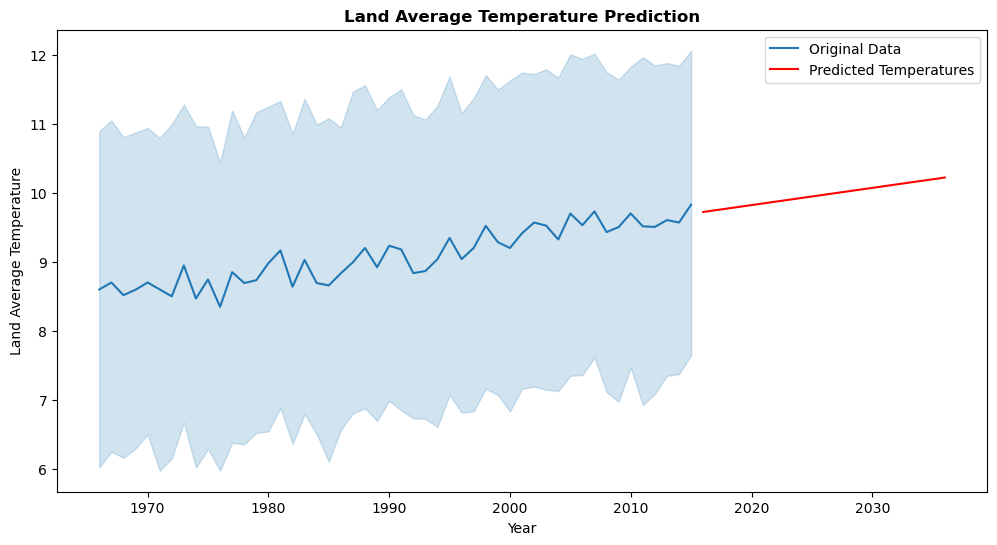

In [427]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# [29]scikit-learn developers,2023.

data = pd.read_csv('files/GlobalTemperatures.csv')

#converting 'dt' column to datetime and extracting the year
data['Period'] = pd.to_datetime(data['dt']).dt.year

#splitting the data into features (X) and target variable (y)
X = data[['Period']]
y = data['LandAverageTemperature']

#create the linear regression model
reg = LinearRegression().fit(X, y)

#generating years from 2016 to 2036
future_years = pd.DataFrame({'Period': range(2016, 2037)})

#predicting temperatures for future years
predicted_temperatures = reg.predict(future_years)

# Visualization
plt.figure(figsize=(12, 6))

#original data
sns.lineplot(data=data, x='Period', y='LandAverageTemperature', label='Original Data')

#predicted temperatures
plt.plot(future_years['Period'], predicted_temperatures, color='red', label='Predicted Temperatures')

#plot setting
plt.xlabel('Year')
plt.ylabel('Land Average Temperature')
plt.title('Land Average Temperature Prediction', fontweight='bold')
plt.legend()
plt.show()


> The model created with the random distribution looks more accurate than the one created with SKLearn, a second opinoon on that would be highly appreciated. We also believe that the reaosn why a straight line is shown is because the data added goes only from 1950. 
But either way, both plots indicate a strong positive correlation between 'Year' and 'Land Average Temperature'.

>Predicting Future Trends in CH4, CO2, and Temperature:
Among the key factors contributing to climate change are greenhouse gases such as CH4 and CO2, wich influence global temperature patterns, however, some studies also show that it can be viceversa.

>Greenhouse gases, including Methane (CH4) and Carbon Dioxide (CO2) have a significant influence on Earth's climate. These gases trap heat in the atmosphere, giving rise to the greenhouse effect and consequent temperature alterations. The changes observed are directly linked to human activities as the combustion of fossil, agricultural practices, deforestation, etc.

>An examination of historical data confirm a pattern in the emissions of CH4 and CO2, as well as temperature variations. During the last century, there has been a marked escalation in the levels of greenhouse gases, coinciding with a global raise of temperatures. Predictinons indicate an even more pronounced increase in these levels for the upcoming decades.

## References: 
-----------------------------------------------

[1] Jouzel et al.,(2007). Temperature Data from Jouzel - epicaDC.deuttemp.EDC3-AICC Legal. Available at: https://vlegalwaymayo.atu.ie/mod/resource/view.php?id=874744#:~:text=epicaDC.deuttemp.EDC3%2DAICC.xls (Accessed: December)
[2] Luthi et al. 2008 Nature Paper. Available at: https://static-content.springer.com/esm/art%3A10.1038%2Fnature06949/MediaObjects/41586_2008_BFnature06949_MOESM31_ESM.xls (Accessed: December)
[3] Mark Tolonen, (2020) Comma in numbers causing problem reading csv (2021). https://stackoverflow.com/questions/60398584/comma-in-numbers-causing-problem-reading-csv (Accessed: December)
[4] Todd Iverson, (2017) Data, Types, and Variables. https://yardsale8.github.io/stat489_book/IntroductionToPython/DataTypesAndVariables.html#:~:text=What%20about%20values%20like%20%2217,in%20quotation%20marks%20like%20strings.&text=They're%20strings! (Accessed:December)
[5] Trenton McKinney, (2023). How to invert the x or y axis. https://stackoverflow.com/questions/2051744/how-to-invert-the-x-or-y-axis (Accessed: December 2023)
[6]Bereiter et al. (2014), Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present. https://vlegalwaymayo.atu.ie/mod/url/view.php?id=874743#:~:text=Click%20on-,Link%20to%20CO2%20data%20from%20IPCC%20Report%20(Link%20below),-to%20open%20the (Access: december2023)
[7] 8one6, (2014). Matplotlib showing x-tick labels overlapping https://stackoverflow.com/questions/26700598/matplotlib-showing-x-tick-labels-overlapping (Accessed: December 2023)
[8]Rishikesh Kumar Rishi, (2023). How to make two plots side-by-side using Python? https://www.tutorialspoint.com/how-to-make-two-plots-side-by-side-using-python (Access: December 2023)
[9] Only god knows (2023) Matplotlib setting title bold while using "Times New Roman"  https://stackoverflow.com/questions/18962063/matplotlib-setting-title-bold-while-using-times-new-roman (Access: December 2023)
[10] (Joe Barton, US House of Representatives (Texas) 1985-2019) https://skepticalscience.com/co2-lags-temperature-advanced.htm#:~:text=It%20presents%20a%20false%20dichotomy%20by%20claiming%20that%20if%20atmospheric Access(December: 2023)
[11] Naveen. Pandas Select Columns by Name or Index (2023) https://sparkbyexamples.com/pandas/pandas-select-columns-by-name-or-index/ (Access: December 2023)
[12] Michael Waskom (2023) Seaborn.lineplot https://seaborn.pydata.org/generated/seaborn.lineplot.html (Access: December 2023)
[13] ELaetitia Loulergue, et al. 2008, PICA Dome C Ice Core 800KYr Methane Data PICA Dome C Ice Core 800KYr Methane Data https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt (Access: december 2023)
[14] USE OF NOAA GML DATA Xin Lan (2024), USE OF NOAA GML DATA https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_mm_gl.txt (Access: december 2023)
[15] Rishikesh Kumar Rishi, (2023). How to get the correlation between two columns in Pandas? https://www.tutorialspoint.com/how-to-get-the-correlation-between-two-columns-in-pandas#:~:text=Initialize%20two%20variables%2C%20col1%20and%20col2%2C%20and%20assign%20them%20the (Accessed:december 2023)
[16] BMJ Publishing Group Ltd., 2024, 11. Correlation and regression https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression#:~:text=If%20we%20wish%20to%20label%20the%20strength%20of%20the%20association%2C%20for%20absolute%20values%20of%20r%2C%200%2D0.19%20is%20regarded%20as%20very%20weak%2C%200.2%2D0.39 (Access: december 2023)
[17] RASGO Intelligence, 2024. How to Create Lag Variables in Pandas https://www.rasgoml.com/feature-engineering-tutorials/how-to-create-lag-variables-in-pandas (Access: January 2024)
[18] UK Meteorological Office Note, (2018). Composite Rainfall Time Series from 1711-2016 for Ireland https://www.met.ie/cms/assets/uploads/2018/01/Long-Term-IIP-1711-2016.zip (Access: December 2023)
[19] Vijetha, (2023). Pandas Extract Year from Datetime https://sparkbyexamples.com/pandas/pandas-extract-year-from-datetime/#:~:text=You%20can%20use%20%25Y%20as,to%20convert%20String%20to%20Datetime. (Access: December 2023)
[20]Mcginley, B. (2023). Time-series - Dealing with datasets. https://atlantictu-my.sharepoint.com/personal/brian_mcginley_atu_ie/_layouts/15/stream.aspx?id=%2Fpersonal%2Fbrian%5Fmcginley%5Fatu%5Fie%2FDocuments%2FTime%2Dseries%20%2D%20Dealing%20with%20datasets%2Emp4&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJTdHJlYW1XZWJBcHAiLCJyZWZlcnJhbFZpZXciOiJTaGFyZURpYWxvZyIsInJlZmVycmFsQXBwUGxhdGZvcm0iOiJXZWIiLCJyZWZlcnJhbE1vZGUiOiJ2aWV3In19&ga=1&referrer=StreamWebApp%2EWeb&referrerScenario=AddressBarCopied%2Eview (Access: December 2023)
[21]Naveen, (2024). Pandas Convert Date (datetime) to String Format https://sparkbyexamples.com/pandas/pandas-convert-datetime-to-string-format/  (Access: December 2023) 
[22] tdy, 2022. Linear regression with matplotlib / numpy
#https://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy (Accessed:december 2023)
[23] MTM02, 2023. Temperature. https://data.cso.ie/table/MTM02 (Access: December 2023)
[24] CLIMATE.GOV STAFF, (2015). History of Earth's temperature since 1880 https://www.climate.gov/news-features/videos/history-earths-temperature-1880#:~:text=For%20the%20last%2050%20years%2C%20global%20temperature%20rose%20at%20an%20average
[25]Data Society, (2016). GlobalLandTemperatures/GlobalTemperatures.csv https://data.world/data-society/global-climate-change-data/workspace/file?filename=GlobalLandTemperatures%2FGlobalTemperatures.csv (Access: December 2023)
[26] Malli, 2023. How to Get Column Average or Mean in Pandas DataFrame. https://sparkbyexamples.com/pandas/pandas-get-column-average-mean/#:~:text=To%20get%20column%20average%20or%20mean%20from%20pandas%20DataFrame%20use,values%20along%20the%20specified%20axis. (Access: december 2023)
[27] NumPy Developers, (2022). Numpy.random.uniform https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html#:~:text=random.uniform(low%3D0.0%2C%20high%3D1.0%2C%20size%3DNone) (Access: december 2023)
[28] NumPy Developers, (2022) Numpy.sort https://numpy.org/doc/stable/reference/generated/numpy.sort.html#:~:text=Parameters%3A-,aarray_like,-Array%20to%20be (Access: december 2023)
[29]scikit-learn developers,2023. sklearn.linear_model.LinearRegression https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 
[30] Python examples, 2023. Convert CSV file to JSON https://pythonexamples.org/python-csv-to-json/